In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'az-handwritten-alphabets-in-csv-format:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F9726%2F17999%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T085909Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D457e14ec4dd1c8ddaa7faf9e7ca6881b38851d532166953c66feb81d3a4ce8e15b1941bb9a1f3c6127a71d7c4b2ca8cfc7d65c0b9c2e563e3004a1f3fe5551c702ca0aeff52512422439c19ae82145dd0fab306d0e8c9d85b3cb6851775b2c2db18ba792c93c52d367693767e7c0a1ae35d56fc14608d99b6a9774187d2d3cf6e442fea9cab43fdd9fdb8e2c490f092d17f69c70f1769c9bc5b6a97e953aa5d557b7cefc44ad9de8e3e1be739b12e872ff8db897a22d094af80bf7c37323fe6c646de92a666444f1ddfc02c00ffe93fba58b4240c34d74a6a4e452a792f33580a000d2f77d430b1a64ef16a15ae2d5531fc422e9055ed51cf02823c05e4dcb72,customclasses:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4464838%2F7996461%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240401%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240401T085909Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3b228e80e72008baf47f32667a479e84a12b0dd4930583e2e009374e08ed92b683d12f96458be59c9cec17b2dfa8730fce238f407ce0d62267563794549f31ab538d2b30cdbdfa1b14902e3b6d340d373868cb0168ad6ee93099a4ec83e98aaba84886aeaf53638c5359b57f92cf489c1030982c0fac03b8f61dccd7875a20cf18e00c7757436b3df2ff0e3cf9af28aaf77b784b043b9e1ea08b74470afad2260a816d373a7f56ef4d46497f245441dd83d5cf7a4b10c8dbf760739be7d0f53ab87215bd2686964d5f36670ebba57a1ca0f9f17654e38208bf2a3f973445109f4be110881214fd2f10aa92ea2afbe8fae76fd0d71ed2e9f91bb572a814135b63'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 193643888 bytes downloaded
Downloaded and uncompressed: az-handwritten-alphabets-in-csv-format
[==================================================] 12296 bytes downloaded
Downloaded and uncompressed: customclasses
Data source import complete.


In [2]:
#import keras
#from keras import layers
#from keras import ops

import os
import numpy as np
import matplotlib.pyplot as plt


import os, time, json

for dirname, _, filenames in os.walk('/kaggle/input'):
    if dirname.split('/')[-1] == 'customclasses':
        if dirname not in os.sys.path:
            os.sys.path.insert(0, dirname)
        for filename in filenames:
            print(os.path.join(dirname, filename))


# Import all custom variables and modules
from preprocessing import *
# from Unet_like import *
from fnet import *

RND_STATE = 247
keras.utils.set_random_seed(RND_STATE)

INTERACTIVE_SESSION = True

from tensorflow.data import Dataset as tf_data


/kaggle/input/customclasses/preprocessing.py
/kaggle/input/customclasses/setup.py
/kaggle/input/customclasses/fnet.py
/kaggle/input/customclasses/Unet_like.py
/kaggle/input/customclasses/ae.py
/kaggle/input/customclasses/deeplabv3plus.py


## Data preparation and model configurations

In [3]:
    print("{}\n\t{}\n{}".format('='*55,'Data preparation and model configurations', '-'*55))
    # Hand-written alphabet images
    start = time.time()
    if 'letters' not in dir():
        letters = MNIST_letters(
            '/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv'
        )

    # Load data (split ratio = train:val:test = 5:1:4)
    (x_train, _), (x_test, _), (x_val, _) = \
        letters.split_data(train_ratio=0.5, val_ratio=1./6, random_state=RND_STATE)

    print("Shape of dataset: {}".format(str(letters.df.shape)))
    print("Shape of training data: {}".format(str(x_train.shape)))
    print("Shape of validation data: {}".format(str(x_val.shape)))
    print("Shape of test data: {}".format(str(x_test.shape)))

    # Model configurations
    conf = model_config(
        epochs=100,
        batch_size=256,
        shuffle=True,
        scaling=1,
        verbose=1,
        save_path='/kaggle/working/',
        augmentation=False,
        pos_label=letters.pos_label
    )




	Data preparation and model configurations
-------------------------------------------------------
Shape of dataset: (144013, 784)
Shape of training data: (60005, 28, 28)
Shape of validation data: (12001, 28, 28)
Shape of test data: (72007, 28, 28)


## Create data generator for respective data samples and labels

In [4]:


    train_dataset = tf_data.from_tensor_slices(letters.generate_data(x_train)) \
                    .batch(conf.training_args['batch_size'])
    val_dataset = tf_data.from_tensor_slices(letters.generate_data(x_val)) \
                    .batch(conf.training_args['batch_size'])
    x_test, y_test = letters.generate_data(x_test)
    print("Train Dataset:", train_dataset)
    print('...elapsed time: ___{:5.2f} minutes___'.format((time.time()-start) / 60))


    es_callback = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )

    conf.set( validation_data=val_dataset,  callbacks=[es_callback] )
    conf.set('compile')
    conf.info()


Train Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 28, 28, 1), dtype=tf.int64, name=None))>
...elapsed time: ___ 0.51 minutes___
        compile_args:
                     optimizer: adam
                          loss: binary_crossentropy
       training_args:
                        epochs: 100
                    batch_size: 256
                       shuffle: True
                       verbose: 1
               validation_data: <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
                     callbacks: <class 'tensorflow.python.trackable.data_structures.ListWrapper'>
          model_arch:
                     img_shape: (28, 28)
                   target_size: (28, 28)
                  channels_dim: (1, 1)
                       scaling: 1
                  augmentation: False
                     threshold: 0.95
                     pos_label: 1
new_training_session: False
        

## Build  model

In [5]:


    print("\n\n{}\n\t{}\n{}".format('='*55,f'Build model', '-'*55))
    m_obj = FNET2D(panel_sizes=[32,64,128,256], model_arch=conf.model_arch)
    model = m_obj.build_model()
    # model.summary()
    # keras.utils.plot_model(model, 'm_obj.png',show_shapes=True)
    print(f"Total trainable wieghts: {model.count_params():,}")






	Build model
-------------------------------------------------------
inputs padded by 2 to fit model design
Cropping the output by 2 to fit input...
Total trainable wieghts: 8,065,089


## Train and evaluate  model



	Train fnet model
-------------------------------------------------------
Model training...
Epoch 1/100
235/235 [==============================] - 93s 203ms/step - loss: 0.8520 - val_loss: 0.4362
Epoch 2/100
235/235 [==============================] - 44s 186ms/step - loss: 0.1415 - val_loss: 0.3469
Epoch 3/100
235/235 [==============================] - 45s 190ms/step - loss: 0.1053 - val_loss: 0.1377
Epoch 4/100
235/235 [==============================] - 45s 193ms/step - loss: 0.0893 - val_loss: 0.0932
Epoch 5/100
235/235 [==============================] - 46s 194ms/step - loss: 0.0796 - val_loss: 0.0933
Epoch 6/100
235/235 [==============================] - 45s 191ms/step - loss: 0.0727 - val_loss: 0.0844
Epoch 7/100
235/235 [==============================] - 45s 193ms/step - loss: 0.0676 - val_loss: 0.0920
Epoch 8/100
235/235 [==============================] - 45s 193ms/step - loss: 0.0643 - val_loss: 0.0888
Epoch 9/100
235/235 [==============================] - 46s 193ms/step - lo

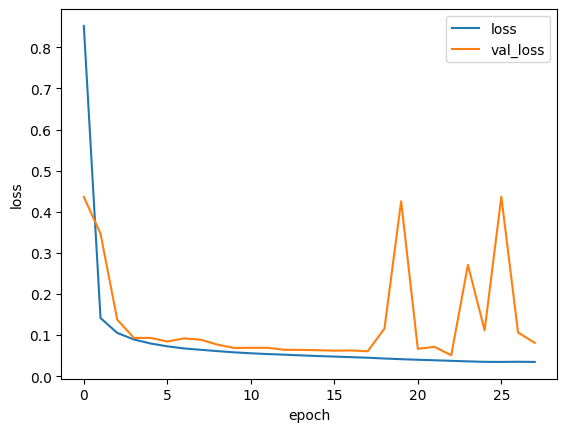

In [6]:
    print("\n\n{}\n\t{}\n{}".format('='*55,f'Train {m_obj.Name} model', '-'*55))

    conf.execute_training(
        model,
        data=train_dataset,
        saveas=m_obj.Name,
        plot_history=INTERACTIVE_SESSION
    )





	Evaluate fnet model
-------------------------------------------------------
2251/2251 [==============================] - 29s 12ms/step
evaluation elapsed time:___ 4.42___minutes


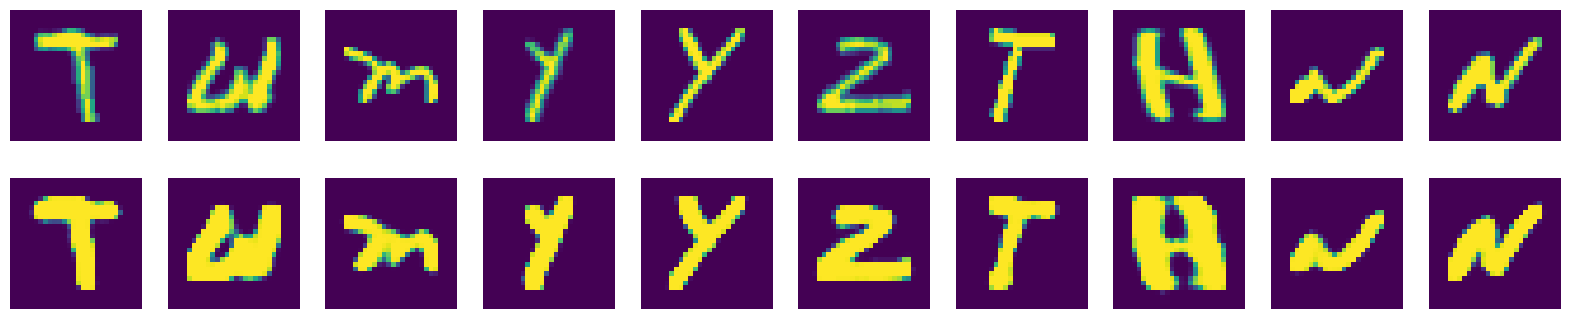

In [7]:
    print("\n\n{}\n\t{}\n{}".format('='*55,f'Evaluate {m_obj.Name} model', '-'*55))
    decoded_imgs = model.predict(x_test)
    m_obj.evaluate_sklearn(y_test, decoded_imgs,report=True)

    if INTERACTIVE_SESSION:
        display_sample_images(x_test, decoded_imgs, conf.img_shape)